In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\\superstore_sales_analysis/Data/superstore.csv',encoding='latin1')

In [1]:
pwd

'D:\\superstore_sales_analysis'

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

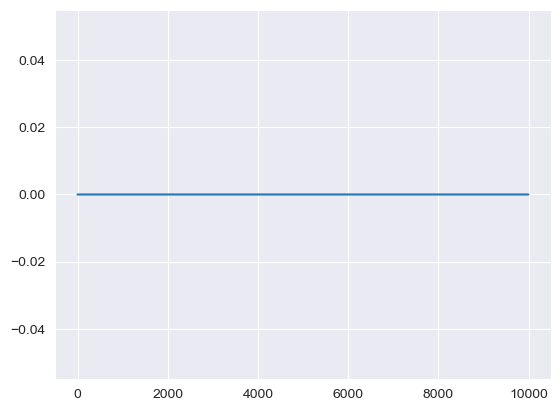

In [6]:
df.isnull().sum(axis=1).plot()

No Null values

<Axes: >

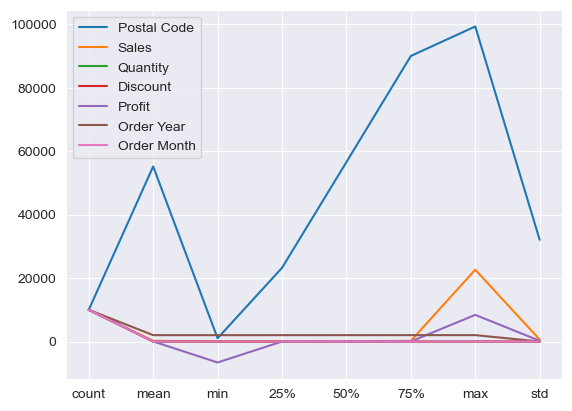

In [14]:
df.describe().plot()

#### Profit has negative value

In [21]:
negative_profit_mask = df['Profit'] < 0

negative_profits = df[negative_profit_mask]
negative_profits['Profit']


3       -383.0310
14      -123.8580
15        -3.8160
23        -1.0196
27     -1665.0522
          ...    
9920     -35.8176
9921      -4.5936
9931     -40.1960
9937      -1.7772
9962     -67.6704
Name: Profit, Length: 1870, dtype: float64

In [23]:
num_negative_profits = negative_profit_mask.sum()
total_series = len(df)
percentage_negative_profits = (num_negative_profits / total_series) * 100

print(f"\nNumber of Negative Profit Entries: {num_negative_profits}")
print(f"Total Number of Entries: {total_series}")
print(f'Percentage Negative Profits: {percentage_negative_profits:.2f}%')


Number of Negative Profit Entries: 1870
Total Number of Entries: 9993
Percentage Negative Profits: 18.71%


### Further analysis for checking the reason for negative Profit

In [29]:
# Discount Percentage 
negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100

avg_discount_neg = negative_profits['Discount_Percentage'].mean()
print(f"\nAverage Discount Percentage for Negative Profits: {avg_discount_neg:.2f}%")


Average Discount Percentage for Negative Profits: 5.53%


C:\Users\SOULS\AppData\Local\Temp\ipykernel_18352\2782112406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['Discount_Percentage'] = (df['Discount'] / df['Sales']) * 100


In [30]:
# Profit Margin
negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100

avg_profit_neg = negative_profits['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")


Average Profit Margin for Negative Profits: -62.49%


C:\Users\SOULS\AppData\Local\Temp\ipykernel_18352\1862383723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_profits['profit_margin'] = (df['Profit'] /df['Sales']) * 100


##### For every dollar sales in these transactions, the business is incurring a loss of approximately 69.49 cents.

In [47]:
avg_profit_neg = df['profit_margin'].mean()

print(f"\nAverage Profit Margin for Negative Profits: {avg_profit_neg:.2f}%")


Average Profit Margin for Negative Profits: 12.03%


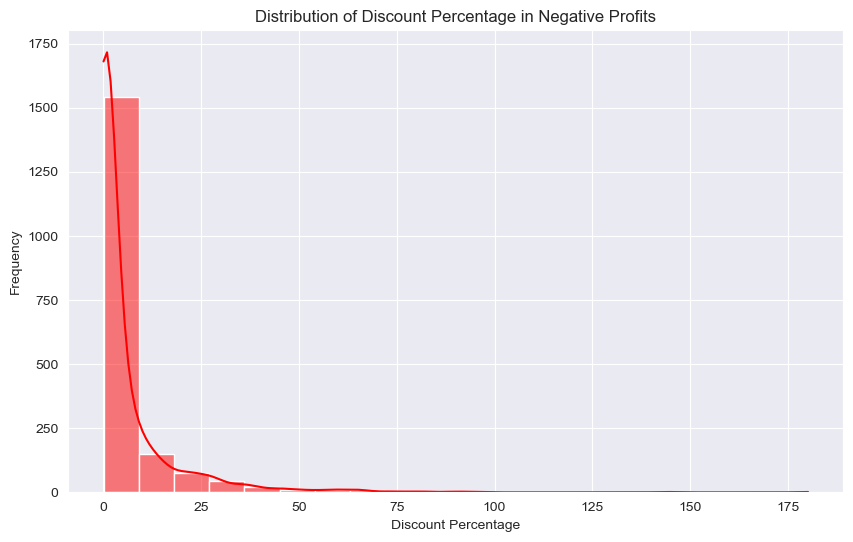

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(negative_profits['Discount_Percentage'], bins=20, kde=True, color='red')
plt.title('Distribution of Discount Percentage in Negative Profits')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

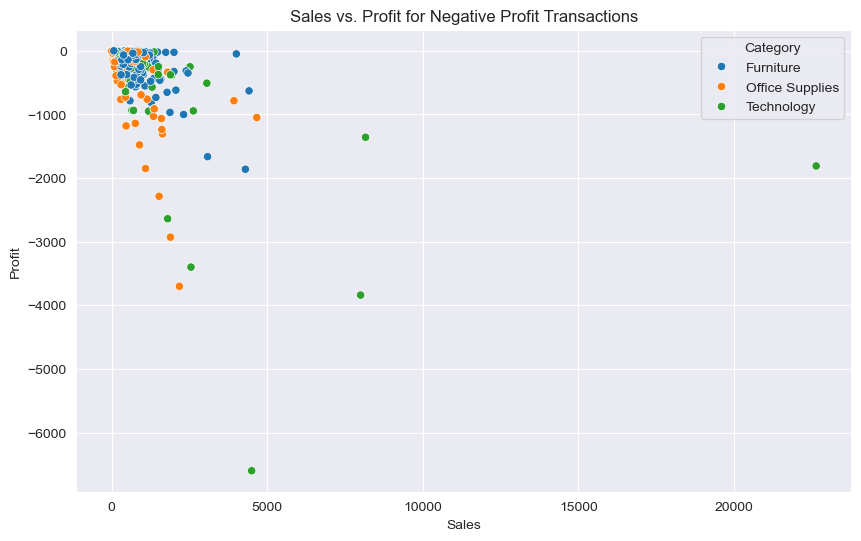

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=negative_profits, hue='Category')
plt.title('Sales vs. Profit for Negative Profit Transactions')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [36]:
# Identifying if high discounts correlated with negative profits.

high_discounts_neg = negative_profits[negative_profits['Discount_Percentage'] > 20]
print(f"\nNumber of Negative Profits with >20% Discounts: {len(high_discounts_neg)} ")
print(high_discounts_neg[['Order ID', 'Sales', 'Discount_Percentage', 'Profit']])


Number of Negative Profits with >20% Discounts: 164 
            Order ID  Sales  Discount_Percentage  Profit
15    US-2015-118983  2.544            31.446541 -3.8160
75    US-2017-118038  1.248            64.102564 -1.9344
101   CA-2016-158568  1.788            44.742729 -3.0396
126   US-2017-107272  2.388            29.313233 -1.8308
198   US-2017-124303  2.946            23.761032 -2.2586
...              ...    ...                  ...     ...
9479  CA-2014-126193  3.828            20.898642 -6.5076
9629  CA-2014-118192  3.438            20.360675 -2.5212
9795  CA-2016-125920  3.798            21.063718 -5.8869
9808  CA-2017-145093  2.112            37.878788 -3.3792
9869  CA-2014-114195  3.132            22.349936 -2.6100

[164 rows x 4 columns]


In [37]:
low_sales_neg = negative_profits[negative_profits['Sales'] < 50]  # Example threshold
print(f"\nNumber of Negative Profits with Sales < $50: {len(low_sales_neg)}")
print(low_sales_neg[['Order ID', 'Sales', 'Profit']])


Number of Negative Profits with Sales < $50: 829
            Order ID   Sales   Profit
15    US-2015-118983   2.544  -3.8160
28    US-2015-150630   9.618  -7.0532
32    US-2015-150630   6.858  -5.7150
75    US-2017-118038   1.248  -1.9344
76    US-2017-118038   9.708  -5.8248
...              ...     ...      ...
9870  CA-2014-114195  22.428 -17.9424
9877  US-2017-166324   8.700  -6.3800
9903  CA-2014-122609  25.128  -6.9102
9920  CA-2016-149272  22.386 -35.8176
9921  CA-2014-111360   5.742  -4.5936

[829 rows x 3 columns]


In [38]:
# Checking if certain categories or products are consistently generating negative profits
category_neg = negative_profits['Category'].value_counts()
print("\nNegative Profit by category: ")
print(category_neg)

product_neg = negative_profits['Product Name'].value_counts().head(10)
print("\n Top 10 Products with Negative Profit: ")
print(product_neg)


Negative Profit by category: 
Category
Office Supplies    886
Furniture          713
Technology         271
Name: count, dtype: int64

 Top 10 Products with Negative Profit: 
Product Name
Global Wood Trimmed Manager's Task Chair, Khaki                          12
KI Adjustable-Height Table                                               10
Global High-Back Leather Tilter, Burgundy                                10
Hon 61000 Series Interactive Training Tables                              9
Office Star - Contemporary Task Swivel chair with Loop Arms, Charcoal     8
Storex Dura Pro Binders                                                   8
Global Deluxe Steno Chair                                                 8
GBC Instant Report Kit                                                    8
Novimex Fabric Task Chair                                                 8
Staple remover                                                            8
Name: count, dtype: int64


In [40]:
# Analyzing if specific shipping modes are associated with negative profits.
shipping_neg = negative_profits['Ship Mode'].value_counts()
print("\nNegative Profit by Ship Mode:")
print(shipping_neg)


Negative Profit by Ship Mode:
Ship Mode
Standard Class    1172
Second Class       307
First Class        293
Same Day            98
Name: count, dtype: int64


In [42]:
# Investigation if certain regions are more prone to negative profit.

region_neg = negative_profits['Region'].value_counts()
print("\nNegative Profit by Region: ")
print(region_neg)


Negative Profit by Region: 
Region
Central    741
East       552
West       318
South      259
Name: count, dtype: int64


In [43]:
# Display a sample of negative profit transactions
sample_neg = negative_profits.sample(n=5, random_state=42)
print("\nSample Negative Profit Transactions:")
print(sample_neg)



Sample Negative Profit Transactions:
            Order ID Order Date   Ship Date       Ship Mode Customer ID  \
9103  CA-2015-163181 2015-11-07  11/12/2015  Standard Class    AB-10105   
8169  CA-2017-107174 2017-11-06  11/13/2017  Standard Class    AB-10060   
5066  CA-2017-142090 2017-11-30   12/7/2017  Standard Class    SC-20380   
1463  CA-2016-152289 2016-08-26   8/28/2016     First Class    LC-16930   
2228  CA-2016-139157 2016-10-01   10/5/2016  Standard Class    GM-14680   

         Customer Name      Segment        Country           City  \
9103     Adrian Barton     Consumer  United States        Houston   
8169   Adam Bellavance  Home Office  United States        Seattle   
5066  Shahid Collister     Consumer  United States     Burlington   
1463    Linda Cazamias    Corporate  United States       Pasadena   
2228     Greg Matthias     Consumer  United States  New York City   

               State  ...  Sub-Category  \
9103           Texas  ...   Furnishings   
8169      

Overall, the discount percentage (5.53%) and steep negative profit margin (-62.49%).


#### 1.2 Data Cleaning 

In [7]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [8]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [9]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [10]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

###### Converting Data Types

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year and Month

In [12]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

* Total Revenue 

In [54]:
df['Total Revenue'] = df['Sales'] - df['Discount']

* Calculating Customer Lifetime Value (CLV)

In [60]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


/tmp/ipykernel_42479/545695867.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])


In [61]:
avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()
customer_lifespan = 2.74

clv = avg_order_value * purchase_frequency * customer_lifespan * customer_lifespan 
clv_df = clv.reset_index(name='CLV')


/tmp/ipykernel_42479/1377583793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
/tmp/ipykernel_42479/1377583793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency = df.groupby('Customer ID')['Order ID'].count()


In [62]:
clv_df

,Customer ID,CLV
0,AA-10315,41761.475456
1,AA-10375,7921.944444
2,AA-10480,13440.946371
3,AA-10645,38182.039466
4,AB-10015,6649.901746
...,...,...
788,XP-21865,17818.222521
789,YC-21895,40944.573500
790,YS-21880,50449.900814
791,ZC-21910,60194.487833


# 2. Exploratory Analysis

In [48]:
# Types of customers
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [50]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customers'})

In [51]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


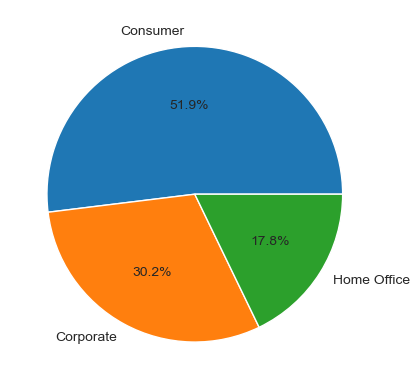

In [54]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%');

* Customer aquisation cost (CAC) - How much does it cost to have a customer in each segment
* How satisfied a customer is in each segment
* Churn Rate 
* Customer segmentation model
* Total sales for each customer type
* Total sales for each segment
* Calculate CLV for each segment to identify which segment generates more Revenue over time 
* ROI
* 

  Type Of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.293718e+05


<BarContainer object of 3 artists>

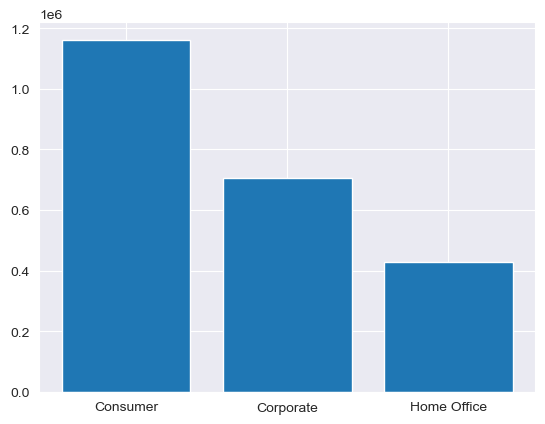

In [57]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type Of Customer','Sales': 'Total Sales'})

print(sales_per_segment)
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

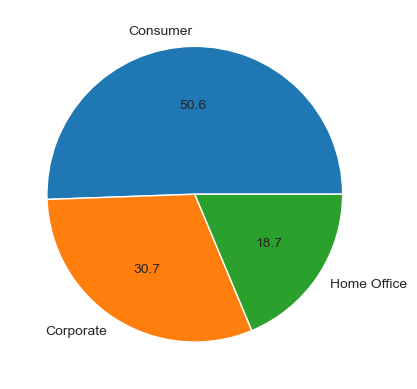

In [59]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customer'], autopct='%1.1f');

### Customer Royalty